<a href="https://colab.research.google.com/github/abhianlytic/LDA/blob/main/Linear_Discriminant_Analysis%E2%80%8A_%E2%80%8AScratch_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive
/gdrive


# LDA from Scratch - Series1
### Mathematical intuition behind LDA

We know PCA, an Unsupervised technique to reduce dimension but we need some another method which is supervised technique, which seperate classes and preserve the seperation of the classes and preserve variance of the data.

One such technique is LDA - Linear Discriminant Analysis, a supervised technique, which has the property to preserve class seperation and variance in the data. 
LDA helps us to find the axes that maximizes the seperation between classes and also minimizes the scatter(variance).
And the goal of LDA is to project feature space(N-Dimensional) onto a smaller subspace k (k<=n-1) while maintaining the class discriminating information.

Here we will understand the mathematical intuition behind the discriminating function and in the later series we will go deeper into understanding projectio using LDA.

We will understand LDA with the famous data set - iris data set.
The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.
Read wiki to know more https://en.wikipedia.org/wiki/Iris_flower_data_set#:~:text=The%20Iris%20flower%20data%20set,example%20of%20linear%20discriminant%20analysis.

We will consider only two classes setosa and virginica, for better understanding of maths behind LDA.

In [4]:
# Loading data from csv file
import pandas as pd
data_path = '/gdrive/MyDrive/BLOGS/LDA/iris_data.csv'
df = pd.read_csv(data_path)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
df = df[df['variety']!='Versicolor']
df.shape

(100, 5)

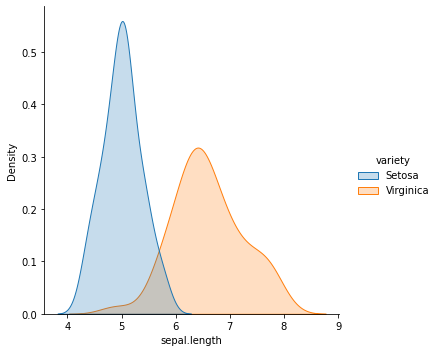

In [6]:
import seaborn as sns
sns.displot(df, x="sepal.length", hue="variety",kind="kde", fill=True)

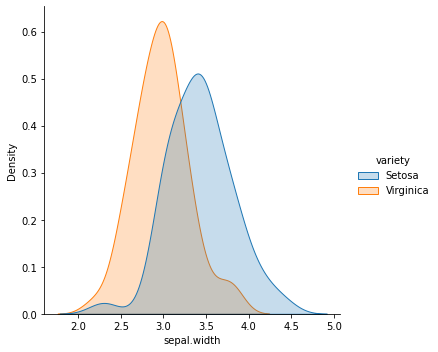

In [7]:
sns.displot(df, x="sepal.width", hue="variety",kind="kde", fill=True)

Which one is better feature to seperate the classes?


1. sepal.length
2. sepal.width



Obviously the first feature which is sepal.length but why? - lets understand
let say we want some function f(µ1,σ1,µ2,σ2)
µ1 - mean of setosa class
σ1 - standard deviation of setosa class
µ2 - mean of Virginica class
σ2 - standard deviation of Virginica class

Now seperation between classes = (µ1-µ2)
we did square as it does not matter much, it just shows square of the distance between two classes.


In [8]:
# Lets calculate mean and standard deviation of each class for sepal.length(sl)
µ1_sl = df[df['variety']=='Setosa']['sepal.length'].mean()
µ2_sl = df[df['variety']=='Virginica']['sepal.length'].mean()

σ1_sl = df[df['variety']=='Setosa']['sepal.length'].std()
σ2_sl = df[df['variety']=='Virginica']['sepal.length'].std()

# Lets calculate mean and standard deviation of each class for sepal.width(sw)
µ1_sw = df[df['variety']=='Setosa']['sepal.width'].mean()
µ2_sw = df[df['variety']=='Virginica']['sepal.width'].mean()

σ1_sw = df[df['variety']=='Setosa']['sepal.width'].std()
σ2_sw = df[df['variety']=='Virginica']['sepal.width'].std()

In [11]:
µ1_sl,µ2_sl,µ1_sw

(5.005999999999999, 6.587999999999998, 3.428000000000001)

In [25]:
round(((µ2_sl-µ1_sl)**2),2)

2.5

In [26]:
print("Seperation between classes in case of sepal.length = ",round(((µ2_sl-µ1_sl)**2),2))

Seperation between classes in sepal.lemgth =  2.5


In [27]:
print("Seperation between classes in case of sepal.width = ",round(((µ2_sw-µ1_sw)**2),2))

Seperation between classes in case of sepal.width =  0.21


That is why we selected sepal.length as the seperation of class is maximum.
Now lets see another feature as below:

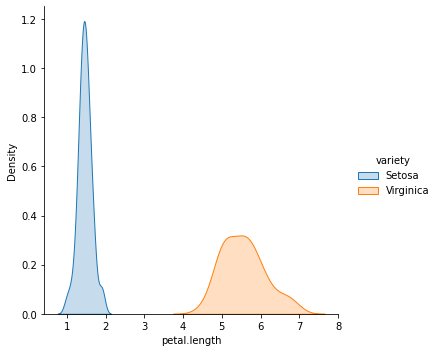

In [15]:
sns.displot(df, x="petal.length", hue="variety",kind="kde", fill=True)

This 3rd feature is far better than the previous two features, visually very clear,why? lets do some more maths:


In [29]:
# Lets calculate mean and standard deviation of each class for petal.length(pl) as well to compare with our previous results
µ1_pl = df[df['variety']=='Setosa']['petal.length'].mean()
µ2_pl = df[df['variety']=='Virginica']['petal.length'].mean()

σ1_pl = df[df['variety']=='Setosa']['petal.length'].std()
σ2_pl = df[df['variety']=='Virginica']['petal.length'].std()

In [30]:
print("Seperation between classes in case of petal.length = ",round(((µ2_pl-µ1_pl)**2),2))

Seperation between classes in case of petal.length =  16.73


WoW, the class seperation is far better than the class seperation in case of sepal.length, but what about variance? 
lets find out within class variance for each feature:

In [31]:
print("Within Class Variance in case of sepal.length = ",round((σ2_sl**2+σ1_sl**2),2))

Within Class Variance in case of sepal.length =  0.53


In [32]:
print("Within Class Variance in case of sepal.width = ",round((σ2_sw**2+σ1_sw**2),2))

Within Class Variance in case of sepal.width =  0.25


In [33]:
print("Within Class Variance in case of petal.length = ",round((σ2_pl**2+σ1_pl**2),2))

Within Class Variance in case of petal.length =  0.33


so the minimum within class variance is for sepal.width, but visually petal.length is better, what to do now?
Lets formulize our optimization function would be to maximize the value of the function, so we define the function as:
f = (between class seperation)/(within class variance)
  = ((µ1-µ2)^2)/(σ1^2+σ2^2)
So to maximize the value of the function we need to minimize variance and maximize seperation.
We call this optimization function as discriminating function.
we will select the top features based on the top values computed using discriminating functions, lets calculate:

In [34]:
print("function value for sepal.length = ",round((((µ2_sl-µ1_sl)**2)/((σ2_sl**2+σ1_sl**2))),2))

function value for sepal.length =  4.73


In [35]:
print("function value for sepal.width = ",round((((µ2_sw-µ1_sw)**2)/((σ2_sw**2+σ1_sw**2))),2))

function value for sepal.width =  0.83


In [36]:
print("function value for petal.length = ",round((((µ2_pl-µ1_pl)**2)/((σ2_pl**2+σ1_pl**2))),2))

function value for petal.length =  49.97


We can see the value is maximum for petal.length,so the discriminating function defined the separation between these two distributions to be the ratio of the **variance between the classes** to the **variance within the classes**.
This is our Linear Discriminant Function, and it is a generalization of Fisher's linear discriminant, a method to find a linear combination of features that separates two or more classes. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

Work for you, calculate the value of discriminant function for petal.width considering only for two classes.

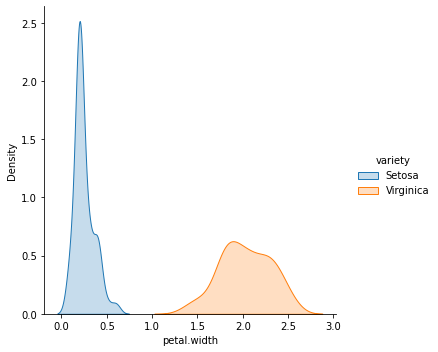

In [16]:
sns.displot(df, x="petal.width", hue="variety",kind="kde", fill=True)

Up-coming series:

1.   calculate discriminant value for all iris variety from scratch 
2.   Find the Fisher projection and compare it with scikit implentation.

